In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
from sklearn.decomposition import PCA
from fa_kit import FactorAnalysis
from fa_kit import plotting as fa_plotting

In [50]:
from sklearn.preprocessing import scale

data = pd.read_excel('C:/Users/acerpc/Desktop/sci_tech.xls',index_col=0)
data = data.fillna(0)
data.to_excel('C:/Users/acerpc/Desktop/data2.xls')

In [41]:
data.corr()

,企业数(个),主营业务收入(亿元),R&D机构数(个),R&D人员全时当量(人年),R&D经费内部支出(万元),R&D项目数(项),R&D项目经费(万元),新产品开发项目数(项),新产品开发经费支出(万元),新产品销售收入(万元),专利申请数（件）,有效发明专利数（件）,技术引进经费支出(万元),消化吸收经费支出(万元),购买国内技术经费支出(万元),全部建成或投产项目数(个),新增固定资产(亿元)
企业数(个),1.000000,0.972877,0.967022,0.978938,0.946303,0.974202,0.942031,0.981232,0.928855,0.967650,0.947468,0.840588,0.798125,0.612488,0.800764,0.836966,0.754088
主营业务收入(亿元),0.972877,1.000000,0.955071,0.958506,0.939681,0.927388,0.934184,0.944947,0.927287,0.974020,0.937355,0.846646,0.814982,0.619713,0.807184,0.796823,0.753443
R&D机构数(个),0.967022,0.955071,1.000000,0.942090,0.890947,0.943424,0.887612,0.946726,0.878259,0.943690,0.894659,0.780733,0.744974,0.674879,0.737881,0.854096,0.766506
R&D人员全时当量(人年),0.978938,0.958506,0.942090,1.000000,0.986374,0.968672,0.984861,0.987727,0.973962,0.982598,0.981481,0.909252,0.876008,0.535997,0.876412,0.732420,0.632173
R&D经费内部支出(万元),0.946303,0.939681,0.890947,0.986374,1.000000,0.927712,0.999007,0.965073,0.995689,0.974456,0.996196,0.957816,0.931667,0.440558,0.930395,0.640077,0.538184
R&D项目数(项),0.974202,0.927388,0.943424,0.968672,0.927712,1.000000,0.922562,0.989552,0.899405,0.932892,0.920907,0.797918,0.748797,0.621914,0.755532,0.806242,0.693874
R&D项目经费(万元),0.942031,0.934184,0.887612,0.984861,0.999007,0.922562,1.000000,0.961523,0.996614,0.974082,0.996641,0.963445,0.939711,0.426049,0.940303,0.631836,0.524816
新产品开发项目数(项),0.981232,0.944947,0.946726,0.987727,0.965073,0.989552,0.961523,1.000000,0.948299,0.961766,0.962300,0.869341,0.825761,0.572310,0.828116,0.761852,0.643838
新产品开发经费支出(万元),0.928855,0.927287,0.878259,0.973962,0.995689,0.899405,0.996614,0.948299,1.000000,0.968551,0.996322,0.976715,0.955116,0.404380,0.952216,0.603239,0.496849
新产品销售收入(万元),0.967650,0.974020,0.943690,0.982598,0.974456,0.932892,0.974082,0.961766,0.968551,1.000000,0.973865,0.918975,0.895970,0.497532,0.889599,0.719166,0.648245


In [42]:
data_scale = scale(data)
data_scale = pd.DataFrame(data_scale,columns=data.columns,index=data.index)
data_scale.to_excel('C:/Users/acerpc/Desktop/data.xls')

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


In [43]:
pca = PCA()
pca.fit(data_scale)
pca.explained_variance_ratio_.cumsum()

array([0.8369371 , 0.95908168, 0.97922624, 0.98921646, 0.9936814 ,
       0.99668386, 0.99794721, 0.99860375, 0.99909305, 0.99951373,
       0.99975717, 0.99986749, 0.99995042, 0.99998156, 0.99998977,
       0.99999633, 1.        ])

In [44]:
fa = FactorAnalysis.load_data_samples(data_scale,preproc_demean=True,preproc_scale=True)
fa.extract_components()

D:\Anaconda3\lib\site-packages\fa_kit\factor_analysis.py:67: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  np_data = df_data.as_matrix()


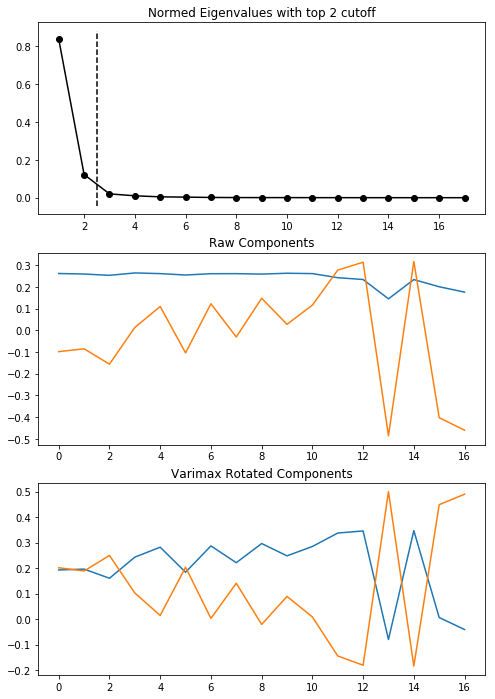

In [45]:
fa.find_comps_to_retain(method='top_n',num_keep=2)

fa.rotate_components(method='varimax')
fa_plotting.graph_summary(fa);

In [46]:
fa_comps = pd.DataFrame(fa.comps['rot'],index=data.columns)
fa_comps

,0,1
企业数(个),0.192928,0.201717
主营业务收入(亿元),0.196323,0.188946
R&D机构数(个),0.160384,0.249951
R&D人员全时当量(人年),0.243369,0.102505
R&D经费内部支出(万元),0.282387,0.014313
R&D项目数(项),0.184130,0.203834
R&D项目经费(万元),0.287401,0.002859
新产品开发项目数(项),0.221521,0.140720
新产品开发经费支出(万元),0.296724,-0.020824
新产品销售收入(万元),0.248372,0.089009


In [47]:
fa_score = pd.DataFrame(fa.get_component_scores(np.array(data_scale)),columns=["A","B"])
fa_score

,A,B
0,0.270433,-0.924441
1,-0.561297,-0.591736
2,-1.105630,0.141440
3,-1.532914,-1.227239
4,-1.594248,-1.225343
5,-1.144340,-1.250313
6,-1.428971,-0.590747
7,-1.397102,-1.194919
8,0.068259,0.509741
9,5.920766,9.241803
